In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# load blob image and convert types
blb = cv2.imread('data/images/blobs.jpg')
blb_rgb = cv2.cvtColor(blb, cv2.COLOR_BGR2RGB)
blb_gry = cv2.cvtColor(blb, cv2.COLOR_BGR2GRAY)
blb_bln = np.zeros_like(blb,np.uint8)

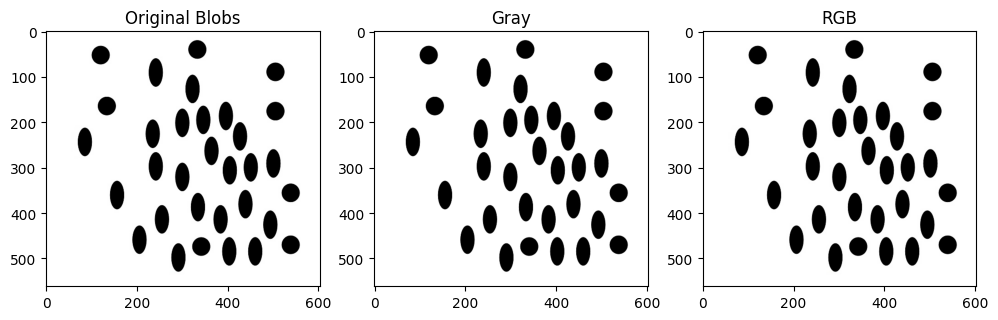

562 603 3


In [15]:
# display unchanged blb images
plt.figure(figsize=(12,12))

plt.subplot(1,3,1)
plt.title("Original Blobs")
plt.imshow(blb)

plt.subplot(1,3,2)
plt.title("Gray")
plt.imshow(blb_gry, cmap='gray')

plt.subplot(1,3,3)
plt.title("RGB")
plt.imshow(blb_rgb)

plt.show()

blb_w, blb_h, blb_c = blb_rgb.shape
print(blb_w, blb_h, blb_c)

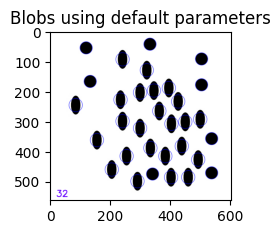

In [20]:
# detect blobs

detector = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(blb_rgb)

blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(blb_rgb, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.putText(blobs, str(len(keypoints)), (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

plt.subplot(1, 1, 1)
plt.title("Blobs using default parameters")
plt.imshow(blobs)


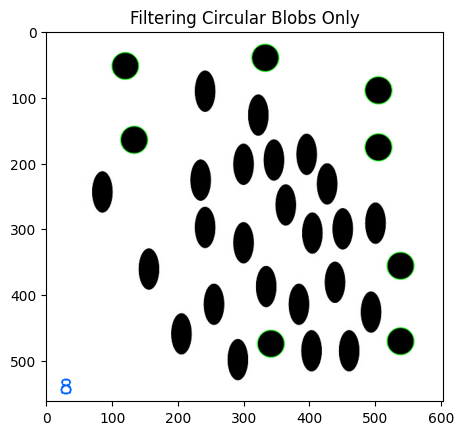

In [21]:
# detect circles only

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100
params.filterByCircularity = True 
params.minCircularity = 0.9
params.filterByConvexity = False
params.minConvexity = 0.2
params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)
    
keypoints = detector.detect(blb_rgb)

blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(blb_rgb, keypoints, blank, (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.putText(blobs, str(len(keypoints)), (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)
plt.subplot(1, 1, 1)
plt.title("Filtering Circular Blobs Only")
plt.imshow(blobs)